In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir('/Users/jkgerdts/stock/')


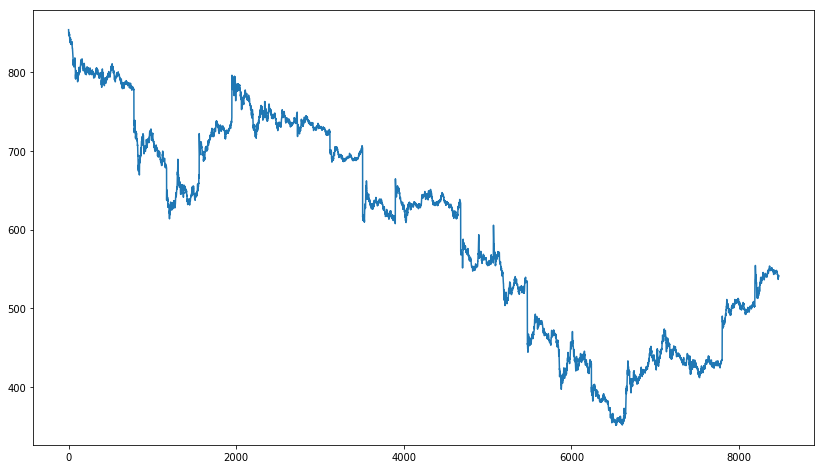

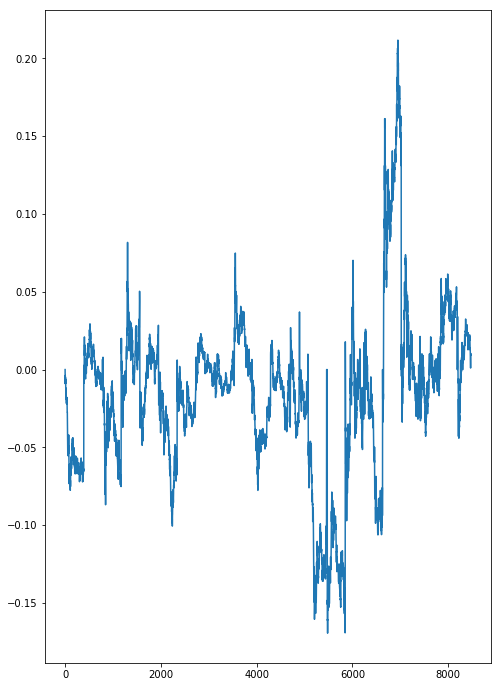

<Figure size 1152x576 with 0 Axes>

In [174]:
sym = 'tsla'
files = [x for x in os.listdir() if sym in x]
dfs = []
for f in files:
    dfs.append(pd.read_csv(f))
df = pd.concat(dfs)

dates = df['date'].unique()
dates.sort()
datedic={}
for i, d in enumerate(dates[::-1]):
    datedic[d]=i

df['daten']=[datedic[x] for x in df['date'].values]


df['timestr']=df['date']+df['minute']
df = df.sort_values('timestr')
df['ind']=range(len(df))
df = df.set_index('ind',drop=True)

# replace NaN values with previous value
lastval = next(x for x in df['close'].values if not (np.isnan(x)))
for i in range(len(df)):
    if np.isnan(df.iloc[i]['close']):
        df.iloc[i, df.columns.get_loc('close')]=lastval
    lastval = df.iloc[i]['close']
    
plt.figure(figsize=[14,8])

plt.plot(df['close'])

opening = df['close'].values.copy()
for i in df['daten'].unique():
    opening[df['daten']==i]=df[df['daten']==i]['close'].values[0]
df['opening']=opening
df['delta']=(df['close'].values-df['opening'].values)/df['opening'].values

plt.figure(figsize=[8,12])
plt.plot(df['delta'])


ahead2hrs = df['delta'].values.copy()
df['ahead2hrs']=ahead2hrs
plt.figure(figsize=[16,8])
for i in df['daten'].unique():
    chunk = df[df['daten']==i]['delta'].values.copy()
    L = len(chunk)
    if L > 120:
        chunk2=chunk[120:]-chunk[0:L-120]
        for j in range(min([120,len(chunk2)])):
            X.append(chunk[j])
            Y.append(chunk2[j])
        #plt.plot(chunk[0:L-120],chunk2,'o',alpha=0.1)
        #df[df['daten']==i]['ahead2hrs'][0:L-120]=chunk.copy()
        df.loc[df['daten']==i,'ahead2hrs'].iloc[0:L-120]=0
    else:
        print(L)

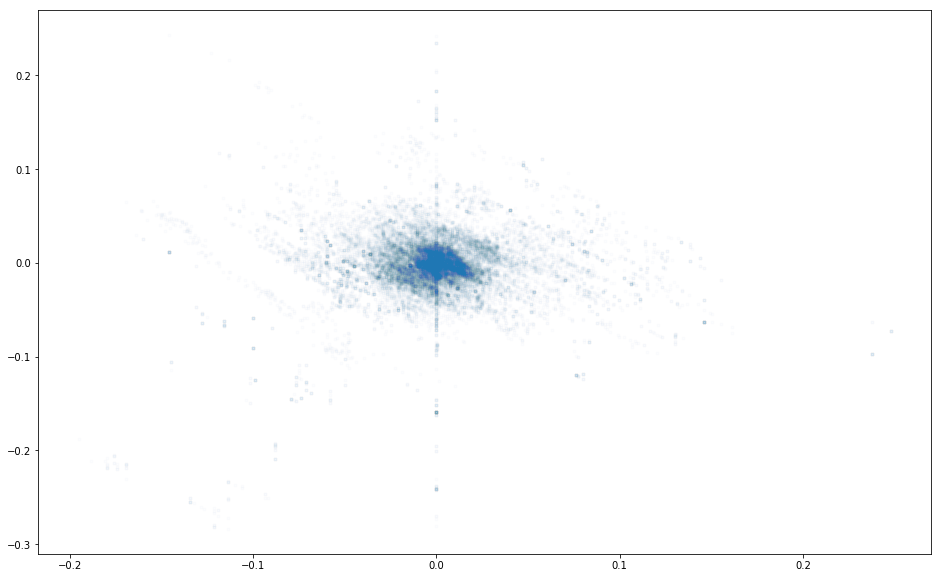

In [176]:
plt.figure(figsize=[16,10])
plt.plot(X,Y,'.',alpha=0.01)